## Notebook to analyse metadata 
- To get statestic about the PC-GITA dataset
- Reduces the amount in the database to match the amount from the PC-GITA database. 

In [1]:
%run project_setup.py 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from constants import *
from functions import plot_histogram, add_columns_to_dataframe, write_to_excel, restructure_id
from EWA_wav_paths import ids_EWA_100, to_short_ids

# Import metadata

In [2]:
# Metadata
metadata_path = os.path.join(personal_path_to_EWA_DB,'SPEAKERS.TSV')
metadata=pd.read_csv(metadata_path,sep='\t') # Get all metadata 
metadata = metadata.rename(columns={"SPEAKER_CODE": "ID"}) # Restructure IDs to be called "ID". 

metadata_inclusive = metadata[["ID", "DIAGNOSIS", "INCLUSIVE_CRITERIA", "LOW_QUALITY", "PUBLISH_AGREEMENT", "AGE", "SEX", "MOCA" , "WAIS"]]

metadata = metadata.loc[metadata['ID'].isin(ids_EWA_100)] # Extract the data with the IDs from 100 people
metadata = metadata[["ID", "DIAGNOSIS", "AGE", "SEX", "MOCA" , "WAIS", "EDUCATION_GRATUATED_SCHOOL", "EDUCATION_YEARS", "FAMILY", "COFFEE"]]


In [3]:

files_info_path = os.path.join(personal_path_to_EWA_DB,'FILES.TSV')
files_info=pd.read_csv(files_info_path,sep='\t')

files_info = files_info.rename(columns={"SPEAKER_CODE": "ID"}) # Restructure IDs to be called "ID". 

# Metadata for inclution criteria: 

Information to fill our in appendix. Check with article of EWA dataset that this is correct. 

In [4]:
display(metadata_inclusive)

,ID,DIAGNOSIS,INCLUSIVE_CRITERIA,LOW_QUALITY,PUBLISH_AGREEMENT,AGE,SEX,MOCA,WAIS
0,3fii0bw601,MCI,True,False,False,64,female,23,1
1,3fii3yyc01,Healthy,False,False,False,73,female,25,2
2,3fii4k6m01,MCI,False,False,False,85,female,21,1
3,3fii51uj01,Healthy,True,False,False,69,female,28,0
4,3fii5rgo01,Alzheimer,False,False,False,75,female,14,3
...,...,...,...,...,...,...,...,...,...
1644,z59pltgh01,Healthy,False,True,False,88,female,5,2
1645,z59pqox301,Healthy,False,False,False,76,female,25,0
1646,z59pw9z801,Healthy,False,True,False,71,female,21,0
1647,z59py5x801,Healthy,False,True,False,82,female,17,0


In [5]:
# Total amount of people (with other diseases):
print("All people in EWA: ", len(metadata_inclusive))

# List of the different diagnosises
print("The different diagnoses: ", list(set(metadata_inclusive["DIAGNOSIS"])))

# Amount of the other diseases
print("People with Alzheimer: ", len(metadata_inclusive[metadata_inclusive["DIAGNOSIS"] == "Alzheimer"]))
print("People with MCI: ", len(metadata_inclusive[metadata_inclusive["DIAGNOSIS"] == "MCI"]))
print("People with Alzheimer-Parkinson: ", len(metadata_inclusive[metadata_inclusive["DIAGNOSIS"] == "Alzheimer-Parkinson"]))

# Amount of PD: 
print("People with Parkinson: ", len(metadata_inclusive[metadata_inclusive["DIAGNOSIS"] == "Parkinson"]))

# Amount of HC: 
print("People in healthy group: ", len(metadata_inclusive[metadata_inclusive["DIAGNOSIS"] == "Healthy"]))

# Removed data based on disease 
metadata_inclusive_pd_hc = metadata_inclusive[(metadata_inclusive['DIAGNOSIS'] == "Healthy") | (metadata_inclusive['DIAGNOSIS'] == "Parkinson")]

# Amount of PD + HC: 
print("Amount of people in PD and HC: ", len(metadata_inclusive_pd_hc))
print(f"Average age is {np.average(metadata_inclusive_pd_hc['AGE'])}")


All people in EWA:  1649
The different diagnoses:  ['Alzheimer', 'MCI', 'Healthy', 'Alzheimer-Parkinson', 'Parkinson']
People with Alzheimer:  87
People with MCI:  62
People with Alzheimer-Parkinson:  2
People with Parkinson:  175
People in healthy group:  1323
Amount of people in PD and HC:  1498
Average age is 68.07676902536716


In [6]:
# Look into low quality and inclusion criteria after removing for publish agreement: 

print(" ------------------------------ ")
print("ORGINALT")
print("People with Parkinson: ", len(metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["DIAGNOSIS"] == "Parkinson"])) # PD
print("People in healthy group: ", len(metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["DIAGNOSIS"] == "Healthy"])) # HC
print("People in HC and PD: ",len(metadata_inclusive_pd_hc[(metadata_inclusive_pd_hc['DIAGNOSIS'] == "Healthy") | (metadata_inclusive_pd_hc['DIAGNOSIS'] == "Parkinson")])) # PD + HC 

test = metadata_inclusive_pd_hc[(metadata_inclusive_pd_hc["PUBLISH_AGREEMENT"] == True)]

print(" ------------------------------ ")
print("AFTER REMOVING FOR PUBLISH AGREEMENT")
print("People with Parkinson: ", len(test[test["DIAGNOSIS"] == "Parkinson"])) # PD
print("People in healthy group: ", len(test[test["DIAGNOSIS"] == "Healthy"])) # HC
print("People in HC and PD: ",len(test[(test['DIAGNOSIS'] == "Healthy") | (test['DIAGNOSIS'] == "Parkinson")])) # PD + HC 

print(" ------------------------------ ")
p = test[test["DIAGNOSIS"] == "Parkinson"]

print("LOW QUALITY AND INCLUSION CRITERIA AFTER REMOVING FOR PUBLISH AGREEMENT: ")
print("People with low quality: ", len(test[test["LOW_QUALITY"] == True])) # Remove these 
print("PD with low quality: ", len(p[p["LOW_QUALITY"] == True])) # Remove these 
print("People that does not pass inclusive criteria ", len(test[test["INCLUSIVE_CRITERIA"] == False])) # Remove these 
print("PD that does not pass inclusive criteria ", len(p[p["INCLUSIVE_CRITERIA"] == False])) # Remove these 

# Look into those PD people with inclusive criteria = False (but has a wav file)
display(p[p["INCLUSIVE_CRITERIA"] == False]) # Remove these 




 ------------------------------ 
ORGINALT
People with Parkinson:  175
People in healthy group:  1323
People in HC and PD:  1498
 ------------------------------ 
AFTER REMOVING FOR PUBLISH AGREEMENT
People with Parkinson:  95
People in healthy group:  863
People in HC and PD:  958
 ------------------------------ 
LOW QUALITY AND INCLUSION CRITERIA AFTER REMOVING FOR PUBLISH AGREEMENT: 
People with low quality:  170
PD with low quality:  6
People that does not pass inclusive criteria  328
PD that does not pass inclusive criteria  3


,ID,DIAGNOSIS,INCLUSIVE_CRITERIA,LOW_QUALITY,PUBLISH_AGREEMENT,AGE,SEX,MOCA,WAIS
425,i4rtm9yg01,Parkinson,False,True,True,80,female,17,6
427,i4rtptr501,Parkinson,False,False,True,88,female,9,4
1325,wsnb1vds01,Parkinson,False,False,True,65,female,19,2


In [7]:
parkinsons_hc_pd = metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["DIAGNOSIS"] == "Parkinson"]
healthy_hc_pd = metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["DIAGNOSIS"] == "Healthy"]


print("-----------------------------------------")
print("IN TOTAL: :")
# PUBLISH_AGREEMENT
print("People with no publish agreement: ", len(metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["PUBLISH_AGREEMENT"] == False])) # Remove these 
# print("People with publish agreement: ", len(metadata_inclusive[metadata_inclusive["PUBLISH_AGREEMENT"] == True]))

# LOW_QUALITY
print("People with low quality: ", len(metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["LOW_QUALITY"] == True])) # Remove these 
# print("People with 'good' quality: ", len(metadata_inclusive[metadata_inclusive["LOW_QUALITY"] == False]))

# INCLUSIVE_CRITERIA
print("People that does not pass inclusive criteria ", len(metadata_inclusive_pd_hc[metadata_inclusive_pd_hc["INCLUSIVE_CRITERIA"] == False])) # Remove these 
# print("People that passes inclusive criteria: ", len(metadata_inclusive[metadata_inclusive["INCLUSIVE_CRITERIA"] == True]))


print("-----------------------------------------")

print("PARKINSONS:")
# PUBLISH_AGREEMENT
print("People with no publish agreement: ", len(parkinsons_hc_pd[parkinsons_hc_pd["PUBLISH_AGREEMENT"] == False])) # Remove these 
# print("People with publish agreement: ", len(parkinsons_hc_pd[parkinsons_hc_pd["PUBLISH_AGREEMENT"] == True]))

# LOW_QUALITY
print("People with low quality: ", len(parkinsons_hc_pd[parkinsons_hc_pd["LOW_QUALITY"] == True])) # Remove these 
# print("People with 'good' quality: ", len(parkinsons_hc_pd[parkinsons_hc_pd["LOW_QUALITY"] == False]))

# INCLUSIVE_CRITERIA
print("People that does not pass inclusive criteria ", len(parkinsons_hc_pd[parkinsons_hc_pd["INCLUSIVE_CRITERIA"] == False])) # Remove these 
# print("People that passes inclusive criteria: ", len(parkinsons_hc_pd[parkinsons_hc_pd["INCLUSIVE_CRITERIA"] == True]))

print("-----------------------------------------")
print("HEALHTY:")
# PUBLISH_AGREEMENT
print("People with no publish agreement: ", len(healthy_hc_pd[healthy_hc_pd["PUBLISH_AGREEMENT"] == False])) # Remove these 
# print("People with publish agreement: ", len(healthy_hc_pd[healthy_hc_pd["PUBLISH_AGREEMENT"] == True]))

# LOW_QUALITY
print("People with low quality: ", len(healthy_hc_pd[healthy_hc_pd["LOW_QUALITY"] == True])) # Remove these 
# print("People with 'good' quality: ", len(healthy_hc_pd[healthy_hc_pd["LOW_QUALITY"] == False]))

# INCLUSIVE_CRITERIA
print("People that does not pass inclusive criteria ", len(healthy_hc_pd[healthy_hc_pd["INCLUSIVE_CRITERIA"] == False])) # Remove these 
# print("People that passes inclusive criteria: ", len(healthy_hc_pd[healthy_hc_pd["INCLUSIVE_CRITERIA"] == True]))



-----------------------------------------
IN TOTAL: :
People with no publish agreement:  540
People with low quality:  272
People that does not pass inclusive criteria  433
-----------------------------------------
PARKINSONS:
People with no publish agreement:  80
People with low quality:  17
People that does not pass inclusive criteria  6
-----------------------------------------
HEALHTY:
People with no publish agreement:  460
People with low quality:  255
People that does not pass inclusive criteria  427


In [8]:
#  REMOVED AND LEFT WITH IN TOTAL AFTER THE 3 CRITERIAS
print("-----------------------------------------")
print("REMOVED FOR THE 3 CRITERIAS")
print("Removed in PD ", len(parkinsons_hc_pd[(parkinsons_hc_pd['LOW_QUALITY'] == True) | (parkinsons_hc_pd['PUBLISH_AGREEMENT'] == False) | (parkinsons_hc_pd['INCLUSIVE_CRITERIA'] == False)]), " elements from these inclusive criterias")
print("Removed in HC ", len(healthy_hc_pd[(healthy_hc_pd['LOW_QUALITY'] == True) | (healthy_hc_pd['PUBLISH_AGREEMENT'] == False) | (healthy_hc_pd['INCLUSIVE_CRITERIA'] == False)]), " elements from these inclusive criterias")
print("Removed in PD and HC ", len(metadata_inclusive_pd_hc[(metadata_inclusive_pd_hc['LOW_QUALITY'] == True) | (metadata_inclusive_pd_hc['PUBLISH_AGREEMENT'] == False) | (metadata_inclusive_pd_hc['INCLUSIVE_CRITERIA'] == False)]), " elements from these inclusive criterias")

print("-----------------------------------------")
print("AFTER REMOVING FOR THE 3 CRITERIAS:")

metadata_removed_inclusive = metadata_inclusive_pd_hc[(metadata_inclusive_pd_hc['LOW_QUALITY'] == False) & (metadata_inclusive_pd_hc['PUBLISH_AGREEMENT'] == True) & (metadata_inclusive_pd_hc['INCLUSIVE_CRITERIA'] == True)]

print("Amount of PD: ", len(metadata_removed_inclusive[metadata_removed_inclusive["DIAGNOSIS"] == "Parkinson"]))
print("Amount of HC: ", len(metadata_removed_inclusive[metadata_removed_inclusive["DIAGNOSIS"] == "Healthy"]))
print("Amount of PD and HC: ", len(metadata_removed_inclusive))



-----------------------------------------
REMOVED FOR THE 3 CRITERIAS
Removed in PD  88  elements from these inclusive criterias
Removed in HC  817  elements from these inclusive criterias
Removed in PD and HC  905  elements from these inclusive criterias
-----------------------------------------
AFTER REMOVING FOR THE 3 CRITERIAS:
Amount of PD:  87
Amount of HC:  506
Amount of PD and HC:  593


In [9]:
# Removing for "sequence is to short"

# print(len(to_short_ids))
print("-----------------------------------------")
metadata_to_short_id = metadata_removed_inclusive[metadata_removed_inclusive['ID'].isin(to_short_ids)] 
print("Amount removing for to short sequence to extract features: ")
print("Amount of PD: ", len(metadata_to_short_id[metadata_to_short_id["DIAGNOSIS"] == "Parkinson"]))
print("Amount of HC: ", len(metadata_to_short_id[metadata_to_short_id["DIAGNOSIS"] == "Healthy"]))
print("Amount of PD and HC: ", len(metadata_to_short_id))

# display(len(metadata_to_short_id))
print("-----------------------------------------")
metadata_removed_short_sequence = metadata_removed_inclusive[~metadata_removed_inclusive['ID'].isin(to_short_ids)] 
print("Amount after removing for to short sequence to extract features: ")
print("Amount of PD: ", len(metadata_removed_short_sequence[metadata_removed_short_sequence["DIAGNOSIS"] == "Parkinson"]))
print("Amount of HC: ", len(metadata_removed_short_sequence[metadata_removed_short_sequence["DIAGNOSIS"] == "Healthy"]))
print("Amount of PD and HC: ", len(metadata_removed_short_sequence))
print("-----------------------------------------")


-----------------------------------------
Amount removing for to short sequence to extract features: 
Amount of PD:  12
Amount of HC:  42
Amount of PD and HC:  54
-----------------------------------------
Amount after removing for to short sequence to extract features: 
Amount of PD:  75
Amount of HC:  464
Amount of PD and HC:  539
-----------------------------------------


In [10]:
# REMOVING FOR DO NOT HAVE 69 UTTERANCES: 

# from metadata_removed_short_sequence, but could also write about metadata_inclusive_pd_hc

files_info_has_69 = files_info[files_info['ID'].isin(list(metadata_removed_short_sequence["ID"]))]

counts = files_info_has_69.groupby('ID').size()  # Group by 'id' and count occurrences
valid_ids = counts[counts == 69].index # Filter the groups where the count is 69
metadata_69_utterances = metadata_removed_short_sequence[metadata_removed_short_sequence['ID'].isin(valid_ids)]  # Filter the DataFrame's based on valid ids

metadata_not_69_utterances = metadata_removed_short_sequence[~metadata_removed_short_sequence['ID'].isin(valid_ids)]  # Filter the DataFrame's based on valid ids

print("-----------------------------------------")
print("AMOUNT THAT DOES NOT HAVE 69 UTTERENCES")
print("Amount of PD: ", len(metadata_not_69_utterances[metadata_not_69_utterances["DIAGNOSIS"] == "Parkinson"]))
print("Amount of HC: ", len(metadata_not_69_utterances[metadata_not_69_utterances["DIAGNOSIS"] == "Healthy"]))
print("Amount of PD and HC: ", len(metadata_not_69_utterances))
print("-----------------------------------------")

print("-----------------------------------------")
print("AMOUNT THAT DOES HAVE 69 UTTERENCES")
print("Amount of PD: ", len(metadata_69_utterances[metadata_69_utterances["DIAGNOSIS"] == "Parkinson"]))
print("Amount of HC: ", len(metadata_69_utterances[metadata_69_utterances["DIAGNOSIS"] == "Healthy"]))
print("Amount of PD and HC: ", len(metadata_69_utterances))



-----------------------------------------
AMOUNT THAT DOES NOT HAVE 69 UTTERENCES
Amount of PD:  14
Amount of HC:  37
Amount of PD and HC:  51
-----------------------------------------
-----------------------------------------
AMOUNT THAT DOES HAVE 69 UTTERENCES
Amount of PD:  61
Amount of HC:  427
Amount of PD and HC:  488


In [11]:
# From these last samples we take out 100 random samples (check EWA_wac_paths) to match PC-GITA. These 100 will be further analysed in this notebook. 

# Metadata for 100 people

In [12]:
display(metadata)

,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE
90,611xqj2u01,Healthy,44,male,27,2,University,17,no occurrence,Yes
120,665udebf01,Healthy,65,female,29,5,University,18,AD,Yes
141,665ur02801,Healthy,65,female,28,2,University,22,no occurrence,Yes
165,b2yux3m001,Healthy,66,male,27,2,University,18,no occurrence,No
194,c8ijy50001,Healthy,56,male,27,7,Secondary,14,no occurrence,Yes
...,...,...,...,...,...,...,...,...,...,...
1537,ysw975bp01,Healthy,66,female,27,4,University,19,no occurrence,Yes
1554,ysw9avix01,Healthy,69,female,30,1,University,24,PD,Yes
1567,ysw9dip001,Healthy,66,male,26,1,Secondary,12,no occurrence,Yes
1578,ysw9gmsr01,Healthy,65,female,27,1,University,18,no occurrence,Yes


In [13]:
# Average age 
print(f"Average age is {np.average(metadata['AGE'])}")

HC = metadata[metadata['DIAGNOSIS'] == "Healthy"]
PD = metadata[metadata['DIAGNOSIS']== "Parkinson"]

print(f"We have {len(HC)} healthy and {len(PD)} Parkinsons Patients. ")

# Seperate data for men and women 
women = metadata[metadata['SEX'] == 'female']
men = metadata[metadata['SEX'] == 'male']
print(" ")
print(f"We have {len(women)} women and {len(men)} men. ")
print(" ")

print(f"Average age for women is {np.average(women['AGE'])}")
print(f"Average age for men is {np.average(men['AGE'])}")

print(f"Average age for HC is {np.average(HC['AGE'])}")
print(f"Average age for PD is {np.average(PD['AGE'])}")



Average age is 65.51
We have 50 healthy and 50 Parkinsons Patients. 
 
We have 50 women and 50 men. 
 
Average age for women is 66.76
Average age for men is 64.26
Average age for HC is 62.78
Average age for PD is 68.24


In [14]:
# In HC: 
HC_women = HC[HC['SEX'] == 'female']
HC_men = HC[HC['SEX'] == 'male']
print(f"We have {len(HC_women)} women and {len(HC_men)} men in the healthy group. ")

print(f"Average age for women in healthy group is {np.average(HC_women['AGE'])}")
print(f"Average age for men in healthy group  is {np.average(HC_men['AGE'])}")
print(" ")

# In PD: 
PD_women = PD[PD['SEX'] == 'female']
PD_men = PD[PD['SEX'] == 'male']
print(f"We have {len(PD_women)} women and {len(PD_men)} men in the healthy group. ")

print(f"Average age for women in PD group is {np.average(PD_women['AGE'])}")
print(f"Average age for men in PD group  is {np.average(PD_men['AGE'])}")



We have 25 women and 25 men in the healthy group. 
Average age for women in healthy group is 62.6
Average age for men in healthy group  is 62.96
 
We have 25 women and 25 men in the healthy group. 
Average age for women in PD group is 70.92
Average age for men in PD group  is 65.56


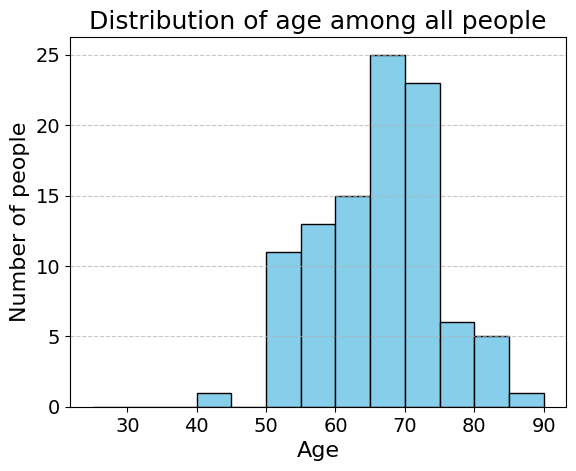

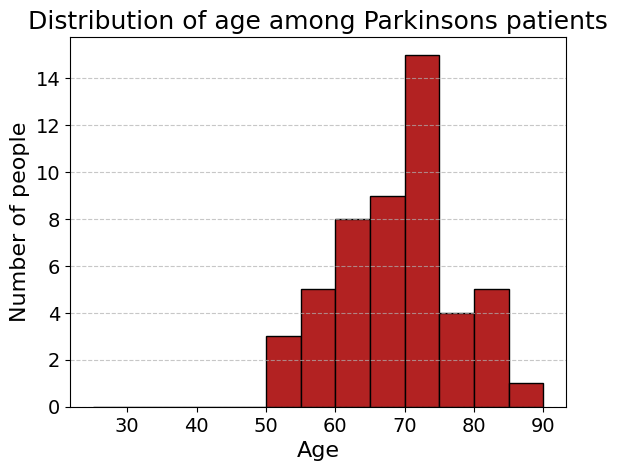

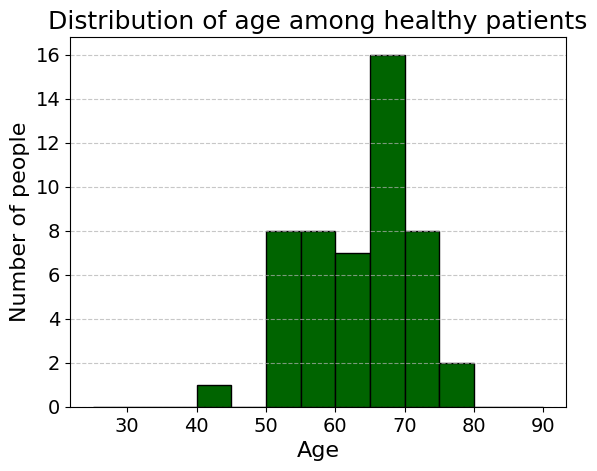

In [15]:
plot_histogram(metadata["AGE"], "Age", "Distribution of age among all people", bins=list(range(25, 95, 5)))
plot_histogram(PD["AGE"], "Age", "Distribution of age among Parkinsons patients", color=PD_color, bins=list(range(25, 95, 5)))
plot_histogram(HC["AGE"], "Age", "Distribution of age among healthy patients", color=HC_color, bins=list(range(25, 95, 5)))


# Other metadata: 

In [16]:
# FAMILY
# print(list(set(metadata["FAMILY"])))

num_no_occurence = len(metadata[metadata["FAMILY"] == "no occurrence"])
num_pd = len(metadata[metadata["FAMILY"] == "PD"])
num_ad = len(metadata[metadata["FAMILY"] == "AD"])
num_adpd = len(metadata[metadata["FAMILY"] == "ADPD"])

print(f"Sicness in familiy - No occurence: {num_no_occurence}, PD: {num_pd}, AD: {num_ad}, ADPD: {num_adpd}")

# COFFEE
# print(list(set(metadata["COFFEE"])))

coffi_yes = len(metadata[metadata["COFFEE"] == "Yes"])
coffi_no = len(metadata[metadata["COFFEE"] == "No"])
coffi_yes_but = len(metadata[metadata["COFFEE"] == "Yes, but less than 3 cups of coffee per week (6 cups of black tea)"])

print(f"Coffie - yes: {coffi_yes}, no: {coffi_no}, Yes, but less than 3 cups of coffee per week (6 cups of black tea): {coffi_yes_but}.")

# EDUCATION_GRATUATED_SCHOOL
# print(list(set(metadata["EDUCATION_GRATUATED_SCHOOL"])))

ed_uni = len(metadata[metadata["EDUCATION_GRATUATED_SCHOOL"] == "University"])
ed_sec = len(metadata[metadata["EDUCATION_GRATUATED_SCHOOL"] == "Secondary"])

print(f"Education - University: {ed_uni}, Secondary: {ed_sec}")


Sicness in familiy - No occurence: 79, PD: 13, AD: 7, ADPD: 1
Coffie - yes: 66, no: 20, Yes, but less than 3 cups of coffee per week (6 cups of black tea): 14.
Education - University: 48, Secondary: 52


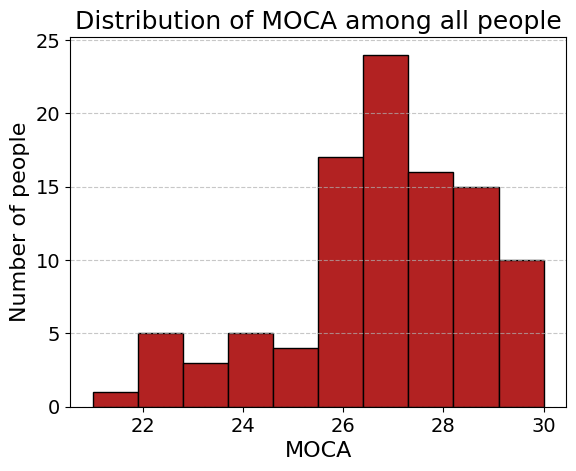

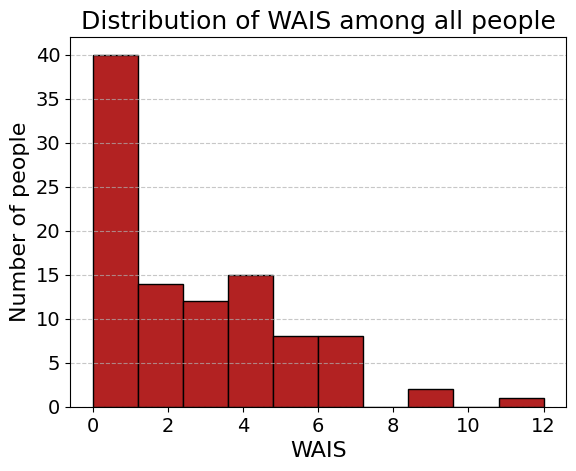

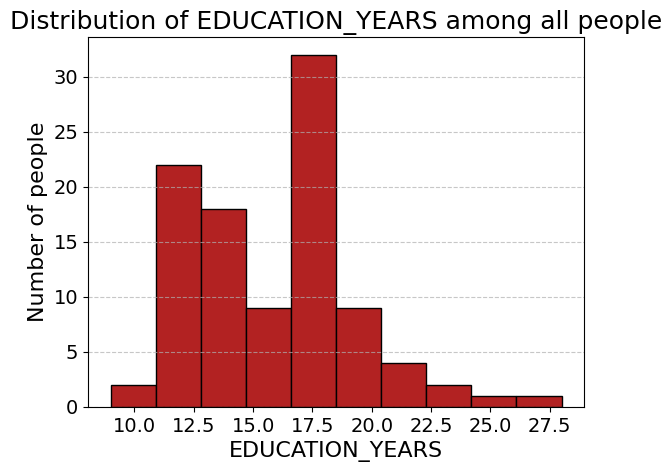

In [17]:
# MOCA
plot_histogram(metadata["MOCA"], "MOCA", "Distribution of MOCA among all people", color=PD_color)

# WAIS
plot_histogram(metadata["WAIS"], "WAIS", "Distribution of WAIS among all people", color=PD_color)

# EDUCATION_YEARS 
plot_histogram(metadata["EDUCATION_YEARS"], "EDUCATION_YEARS", "Distribution of EDUCATION_YEARS among all people", color=PD_color)

In [18]:
def plot_histogram_together(data, labels, xlabel, title, colors, bins = False):
    if bins: 
        plt.hist(data, stacked=True, label=labels, edgecolor = "black", color = colors, bins=bins)
    else:
        plt.hist(data, stacked=True, label=labels, edgecolor = "black", color = colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of people')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

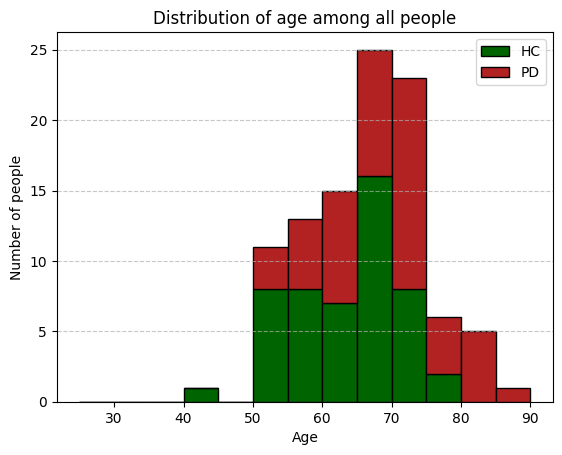

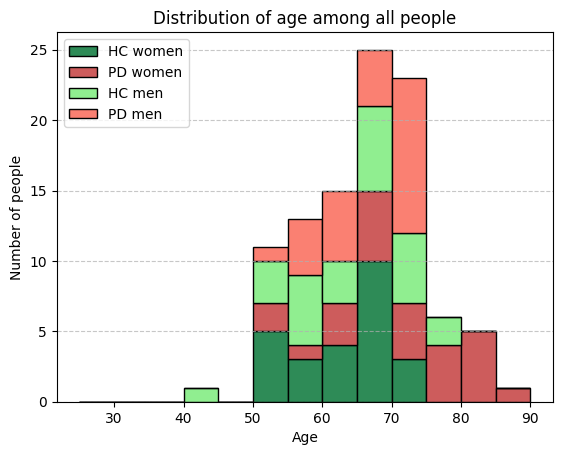

In [19]:
plot_histogram_together([HC["AGE"], PD["AGE"]], ["HC", "PD"], "Age", "Distribution of age among all people", [HC_color, PD_color], bins=list(range(25, 95, 5)))
plot_histogram_together([HC_women["AGE"], PD_women["AGE"], HC_men["AGE"], PD_men["AGE"]], ["HC women", "PD women", "HC men", "PD men"], "Age", "Distribution of age among all people", ["SeaGreen", "IndianRed", "LightGreen", "Salmon"], bins=list(range(25, 95, 5)))

# Fold info 

In [20]:
fold_info_path = os.path.join(personal_path_to_balanced_folds,"kfold-groups-ewa.csv")
fold_info = pd.read_csv(fold_info_path)
display(fold_info)

,ID,Sex,Group,Fold
0,d1aj5bfq01,F,HC,0
1,lj2v9a9r01,M,PD,0
2,noahczv201,M,HC,0
3,tbc501f201,F,HC,0
4,tbc5q3u101,M,PD,0
...,...,...,...,...
95,uc9q48lh01,M,HC,9
96,uw4zeo1h01,M,PD,9
97,wsnb6g5w01,F,PD,9
98,wsnbo4hi01,F,PD,9


In [21]:
# Information about each fold: 
num_folds = len(fold_info["Fold"].unique())

for fold_num in range(num_folds): # Iterate through folds 
    print(" ")
    fold_data = fold_info[fold_info['Fold'] == fold_num]
                    
    num_female = len(fold_data[fold_data['Sex'] == "F"])
    num_male = len(fold_data[fold_data['Sex'] == "M"])
    num_pd = len(fold_data[fold_data['Group'] == "PD"])
    num_hc = len(fold_data[fold_data['Group'] == "HC"])
    print(f"In fold number {fold_num} there are: ")
    print(f"\t Females: {num_female}, Males: {num_male}, PD: {num_pd}, HC: {num_hc}")
    
    # Mixed group (is not the same in each fold, but interesting to know how many.)
    print("\t In HC: ", len(fold_data[(fold_data['Sex'] == "F") & (fold_data['Group'] == "HC")]), " females and ", len(fold_data[(fold_data['Sex'] == "M") & (fold_data['Group'] == "HC")]), "males.")
    print("\t In PD: ", len(fold_data[(fold_data['Sex'] == "F") & (fold_data['Group'] == "PD")]), " females and ", len(fold_data[(fold_data['Sex'] == "M") & (fold_data['Group'] == "PD")]), "males.")
    
    print("\t", *list(fold_data["ID"]))


 
In fold number 0 there are: 
	 Females: 5, Males: 5, PD: 5, HC: 5
	 In HC:  2  females and  3 males.
	 In PD:  3  females and  2 males.
	 d1aj5bfq01 lj2v9a9r01 noahczv201 tbc501f201 tbc5q3u101 tbc5u9nr01 tbc5zcus01 u1unkmy101 u1unospv01 wsnb28dk01
 
In fold number 1 there are: 
	 Females: 5, Males: 5, PD: 5, HC: 5
	 In HC:  3  females and  2 males.
	 In PD:  2  females and  3 males.
	 c8ijy50001 kixj5g8601 kixjnqra01 kixjr33y01 tbc51rtj01 tbc5es9b01 tbc5kai901 tbc5taig01 u1unv52201 wsnbuexj01
 
In fold number 2 there are: 
	 Females: 5, Males: 5, PD: 5, HC: 5
	 In HC:  2  females and  3 males.
	 In PD:  3  females and  2 males.
	 b2yux3m001 fgl9fz7501 kixj7npk01 o2kg4ivh01 o2kgtwiz01 tbc5klt201 u1unjvvw01 wsnbcqhb01 wsnbegjd01 wsnbov1e01
 
In fold number 3 there are: 
	 Females: 5, Males: 5, PD: 5, HC: 5
	 In HC:  3  females and  2 males.
	 In PD:  2  females and  3 males.
	 kixjc4c801 kixjui2r01 o2kgafym01 o2kgzthq01 tbc59a3j01 tbc5xvde01 wsnb4hge01 wsnba93901 wsnbr5vb01 ysw9l33701


# Metadata based on fold number: 
To analyse data in the different folds in a good way. 

In [22]:
all_metadata = add_columns_to_dataframe(metadata, fold_info, ["Group", "Fold"])
display(all_metadata)

,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
90,611xqj2u01,Healthy,44,male,27,2,University,17,no occurrence,Yes,HC,9
120,665udebf01,Healthy,65,female,29,5,University,18,AD,Yes,HC,6
141,665ur02801,Healthy,65,female,28,2,University,22,no occurrence,Yes,HC,5
165,b2yux3m001,Healthy,66,male,27,2,University,18,no occurrence,No,HC,2
194,c8ijy50001,Healthy,56,male,27,7,Secondary,14,no occurrence,Yes,HC,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1537,ysw975bp01,Healthy,66,female,27,4,University,19,no occurrence,Yes,HC,6
1554,ysw9avix01,Healthy,69,female,30,1,University,24,PD,Yes,HC,7
1567,ysw9dip001,Healthy,66,male,26,1,Secondary,12,no occurrence,Yes,HC,8
1578,ysw9gmsr01,Healthy,65,female,27,1,University,18,no occurrence,Yes,HC,9


In [23]:
# Analyse all folds --> For each fold write out average age, length of disease, etc. (Average of all metadata) 

fold_information = pd.DataFrame()
fold_information2 = pd.DataFrame()
fold_information3 = pd.DataFrame()

num_folds = len(fold_info["Fold"].unique())

for fold_num in range(num_folds): # Iterate through folds 
    fold_data = all_metadata[all_metadata['Fold'] == fold_num]    
    
    parkinsons = fold_data[fold_data['Group'] == "PD"]
    
    
    # Average 
    fold_information.at[fold_num, "avg AGE"] = np.average(fold_data['AGE'])
    fold_information.at[fold_num, "avg AGE PD"] = np.average(parkinsons['AGE'])
    
    fold_information.at[fold_num, "avg EDUCATION_YEARS"] = np.average(parkinsons['EDUCATION_YEARS'])
    fold_information.at[fold_num, "avg WAIS"] = np.average(parkinsons['WAIS'])
    fold_information.at[fold_num, "avg MOCA"] = np.average(parkinsons['MOCA'])
    

    fold_information.at[fold_num, "F in HC"] = len(fold_data[(fold_data['SEX'] == "female") & (fold_data['Group'] == "HC")])
    fold_information.at[fold_num, "M in HC"] = len(fold_data[(fold_data['SEX'] == "male") & (fold_data['Group'] == "HC")])
    fold_information.at[fold_num, "F in PD"] = len(fold_data[(fold_data['SEX'] == "female") & (fold_data['Group'] == "PD")])
    fold_information.at[fold_num, "M in PD"] = len(fold_data[(fold_data['SEX'] == "male") & (fold_data['Group'] == "PD")])
    
    fold_information.at[fold_num, "F"] = len(fold_data[fold_data['SEX'] == "female"])
    fold_information.at[fold_num, "M"] = len(fold_data[fold_data['SEX'] == "male"])
    fold_information.at[fold_num, "PD"] = len(fold_data[fold_data['Group'] == "PD"])
    fold_information.at[fold_num, "HC"] = len(fold_data[fold_data['Group'] == "HC"])
    
    
    # Counting how many of each 
    fold_information2.at[fold_num, "Familiy PD"] = len(fold_data[fold_data["FAMILY"] == "PD"])
    fold_information2.at[fold_num, "Familiy no occurrence"] = len(fold_data[fold_data["FAMILY"] == "no occurrence"])
    fold_information2.at[fold_num, "Familiy AD"] = len(fold_data[fold_data["FAMILY"] == "AD"])
    fold_information2.at[fold_num, "Familiy ADPD"] = len(fold_data[fold_data["FAMILY"] == "ADPD"])
    
    fold_information2.at[fold_num, "Coffee Yes"] = len(fold_data[fold_data["COFFEE"] == "Yes"])
    fold_information2.at[fold_num, "Coffee No"] = len(fold_data[fold_data["COFFEE"] == "No"])
    fold_information2.at[fold_num, "Coffee Yes, but"] = len(fold_data[fold_data["COFFEE"] == "Yes, but less than 3 cups of coffee per week (6 cups of black tea)"])
    
    fold_information2.at[fold_num, "Education University No"] = len(fold_data[fold_data["EDUCATION_GRATUATED_SCHOOL"] == "University"])
    fold_information2.at[fold_num, "Education Secondary"] = len(fold_data[fold_data["EDUCATION_GRATUATED_SCHOOL"] == "Secondary"])
    
    #  Showing all values
    fold_information3.at[fold_num, "ID"] = ', '.join(map(str, fold_data['ID']))
    fold_information3.at[fold_num, "AGE"] = ', '.join(map(str, fold_data['AGE']))

    fold_information3.at[fold_num, "AGE PD"] = ', '.join(map(str, parkinsons['AGE']))
    
    fold_information3.at[fold_num, "EDUCATION_YEARS"] = ', '.join(map(str, fold_data['EDUCATION_YEARS']))
    fold_information3.at[fold_num, "WAIS"] = ', '.join(map(str, fold_data['WAIS']))
    fold_information3.at[fold_num, "MOCA"] = ', '.join(map(str, fold_data['MOCA']))

print("Average")
display(fold_information)

print("Number og people in each category (of 10 in total):")
display(fold_information2)

print("Showing all values")
display(fold_information3)
   
    

Average


,avg AGE,avg AGE PD,avg EDUCATION_YEARS,avg WAIS,avg MOCA,F in HC,M in HC,F in PD,M in PD,F,M,PD,HC
0,66.1,71.2,12.8,2.8,25.0,2.0,3.0,3.0,2.0,5.0,5.0,5.0,5.0
1,66.7,71.4,12.2,2.0,26.8,3.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
2,64.0,68.6,14.0,3.2,24.6,2.0,3.0,3.0,2.0,5.0,5.0,5.0,5.0
3,66.1,68.2,15.2,2.6,25.2,3.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
4,67.0,69.2,15.0,2.4,27.0,2.0,3.0,3.0,2.0,5.0,5.0,5.0,5.0
5,63.1,62.8,13.2,4.6,28.0,3.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
6,67.9,70.8,13.6,5.0,26.0,2.0,3.0,3.0,2.0,5.0,5.0,5.0,5.0
7,64.0,64.0,19.0,2.0,25.6,3.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
8,67.6,70.0,15.0,3.4,26.8,2.0,3.0,3.0,2.0,5.0,5.0,5.0,5.0
9,62.6,66.2,19.2,2.0,24.8,3.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0


Number og people in each category (of 10 in total):


,Familiy PD,Familiy no occurrence,Familiy AD,Familiy ADPD,Coffee Yes,Coffee No,"Coffee Yes, but",Education University No,Education Secondary
0,0.0,8.0,2.0,0.0,7.0,1.0,2.0,2.0,8.0
1,2.0,5.0,2.0,1.0,7.0,1.0,2.0,0.0,10.0
2,2.0,8.0,0.0,0.0,4.0,4.0,2.0,5.0,5.0
3,1.0,9.0,0.0,0.0,8.0,1.0,1.0,5.0,5.0
4,0.0,9.0,1.0,0.0,4.0,3.0,3.0,6.0,4.0
5,1.0,9.0,0.0,0.0,6.0,3.0,1.0,5.0,5.0
6,0.0,9.0,1.0,0.0,8.0,2.0,0.0,5.0,5.0
7,4.0,6.0,0.0,0.0,6.0,3.0,1.0,9.0,1.0
8,2.0,7.0,1.0,0.0,9.0,0.0,1.0,3.0,7.0
9,1.0,9.0,0.0,0.0,7.0,2.0,1.0,8.0,2.0


Showing all values


,ID,AGE,AGE PD,EDUCATION_YEARS,WAIS,MOCA
0,"d1aj5bfq01, lj2v9a9r01, noahczv201, tbc501f201...","54, 63, 71, 65, 60, 86, 67, 80, 50, 65","63, 60, 86, 67, 80","14, 13, 15, 16, 12, 9, 13, 17, 12, 20","2, 0, 1, 5, 9, 1, 3, 1, 1, 0","29, 23, 30, 27, 26, 26, 28, 22, 26, 29"
1,"c8ijy50001, kixj5g8601, kixjnqra01, kixjr33y01...","56, 65, 63, 73, 69, 68, 78, 70, 72, 53","69, 68, 78, 70, 72","14, 18, 12, 13, 13, 13, 10, 12, 13, 12","7, 1, 6, 3, 1, 0, 4, 5, 0, 6","27, 27, 30, 26, 27, 29, 25, 25, 28, 28"
2,"b2yux3m001, fgl9fz7501, kixj7npk01, o2kg4ivh01...","66, 83, 60, 57, 57, 57, 69, 57, 52, 82","83, 57, 69, 52, 82","18, 12, 25, 16, 17, 12, 13, 12, 19, 14","2, 0, 4, 1, 2, 3, 6, 0, 3, 4","27, 24, 28, 28, 30, 27, 22, 29, 27, 23"
3,"kixjc4c801, kixjui2r01, o2kgafym01, o2kgzthq01...","70, 67, 52, 72, 72, 74, 67, 59, 64, 64","72, 72, 74, 59, 64","18, 17, 12, 17, 12, 17, 18, 12, 18, 18","0, 5, 3, 0, 4, 4, 2, 1, 4, 0","28, 26, 29, 23, 27, 25, 28, 25, 26, 27"
4,"frvb3fyq01, frvbu7hz01, kixj1huf01, kixj56vy01...","53, 70, 62, 71, 70, 76, 68, 70, 76, 54","62, 70, 76, 68, 70","17, 15, 20, 21, 13, 12, 18, 12, 21, 16","1, 1, 0, 4, 3, 7, 2, 0, 0, 2","27, 27, 29, 27, 27, 26, 27, 26, 27, 27"
5,"665ur02801, d1ajb2sv01, kixjew4x01, o2kgpblm01...","65, 65, 78, 54, 71, 55, 70, 57, 55, 61","71, 55, 70, 57, 61","22, 17, 22, 12, 14, 12, 12, 16, 20, 12","2, 4, 4, 5, 3, 12, 7, 0, 0, 1","28, 28, 29, 30, 29, 29, 26, 30, 30, 26"
6,"665udebf01, fgl9xcdh01, o2kgjpgr01, sfpqnwqv01...","65, 57, 66, 84, 50, 74, 76, 70, 71, 66","84, 50, 74, 76, 70","18, 14, 19, 11, 12, 15, 13, 17, 17, 19","5, 2, 2, 1, 9, 6, 5, 4, 0, 4","29, 28, 28, 21, 28, 24, 27, 30, 26, 27"
7,"d1ajb8zb01, kixj0sc401, kixj5wrh01, kixjyr4v01...","66, 64, 63, 60, 64, 66, 64, 70, 54, 69","66, 66, 64, 70, 54","13, 18, 18, 18, 18, 28, 18, 17, 19, 24","1, 1, 0, 2, 0, 2, 2, 1, 4, 1","24, 27, 28, 27, 30, 26, 22, 26, 30, 30"
8,"d1aj9s0h01, frvb5pmg01, o2kgbizi01, o2kgkx6901...","55, 71, 72, 80, 59, 71, 66, 78, 58, 66","55, 80, 71, 66, 78","17, 18, 13, 12, 13, 13, 18, 15, 12, 12","0, 0, 5, 3, 3, 4, 3, 7, 4, 1","27, 29, 29, 22, 29, 27, 29, 29, 28, 26"
9,"611xqj2u01, kixjpeld01, s9cqonjv01, tbc5kqw401...","44, 67, 70, 66, 69, 50, 60, 74, 61, 65","70, 66, 60, 74, 61","17, 20, 17, 20, 16, 17, 18, 23, 18, 18","2, 5, 3, 0, 2, 0, 3, 4, 0, 1","27, 26, 24, 24, 26, 28, 28, 22, 26, 27"


# Analysing folds more detailed: 

In [24]:

def analyse_metadata(data):
    # Average age 
    print(f"Average age is {np.average(data['AGE'])}")
    
    parkinsons = data[data['Group'] == "PD"]
    healthy = data[data['Group'] == "PD"]

    print(f"We have {len(healthy)} healthy and {len(parkinsons)} Parkinsons Patients. ")

    # Seperate data for men and women 
    women = data[data['SEX'] == 'female']
    men = data[data['SEX'] == 'male']
    print(f"We have {len(women)} women and {len(men)} men. ")
    print(" ")
    
    HC_women = healthy[healthy['SEX'] == 'female']
    HC_men = healthy[healthy['SEX'] == 'male']
    PD_women = parkinsons[parkinsons['SEX'] == 'female']
    PD_men = parkinsons[parkinsons['SEX'] == 'male']

    print(f"Average age for women is {np.average(women['AGE'])}")
    print(f"Average age for men is {np.average(men['AGE'])}")

    print(f"Average age for HC is {np.average(HC['AGE'])}")
    print(f"Average age for PD is {np.average(PD['AGE'])}")


    plot_histogram(data["AGE"], "Age", "Distribution of age among all people", ylim=(0,10))
    plot_histogram(PD["AGE"], "Age", "Distribution of age among Parkinsons patients", ylim=(0,5), color=PD_color)
    plot_histogram(HC["AGE"], "Age", "Distribution of age among healthy patients", ylim=(0,5), color=HC_color)

    plot_histogram(data["EDUCATION_YEARS"], "EDUCATION_YEARS", "Distribution of EDUCATION_YEARS in the fold")
    plot_histogram(data["WAIS"], "WAIS", "Distribution of WAIS in the fold")
    plot_histogram(data["MOCA"], "MOCA", "Distribution of MOCA in the fold")

    plot_histogram_together([healthy["AGE"], parkinsons["AGE"]], ["HC", "PD"], "Age", "Distribution of age among all people", [HC_color, PD_color])
    plot_histogram_together([HC_women["AGE"], PD_women["AGE"], HC_men["AGE"], PD_men["AGE"]], ["HC women", "PD women", "HC men", "PD men"], "Age", "Distribution of age among all people", ["SeaGreen", "IndianRed", "LightGreen", "Salmon"])



In [25]:
fold_num = 1 # Change number to investigate
fold_data = all_metadata[all_metadata['Fold'] == fold_num]
# display(fold_data)
display(fold_data[["ID", "SEX", "Fold"]])
# analyse_metadata(fold_data)

,ID,SEX,Fold
194,c8ijy50001,male,1
478,kixj5g8601,female,1
587,kixjnqra01,female,1
605,kixjr33y01,female,1
1139,tbc51rtj01,female,1
1174,tbc5es9b01,male,1
1187,tbc5kai901,female,1
1218,tbc5taig01,male,1
1273,u1unv52201,male,1
1477,wsnbuexj01,male,1


In [26]:
for i in range(0,10):
    fold_data = all_metadata[all_metadata['Fold'] == i]
    display(fold_data)
    # display(fold_data[["ID", "SEX", "Fold"]])
    # analyse_metadata(fold_data)

,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
208,d1aj5bfq01,Healthy,54,female,29,2,Secondary,14,no occurrence,Yes,HC,0
702,lj2v9a9r01,Parkinson,63,male,23,0,Secondary,13,no occurrence,Yes,PD,0
966,noahczv201,Healthy,71,male,30,1,Secondary,15,AD,Yes,HC,0
1134,tbc501f201,Healthy,65,female,27,5,Secondary,16,no occurrence,"Yes, but less than 3 cups of coffee per week (...",HC,0
1210,tbc5q3u101,Parkinson,60,male,26,9,Secondary,12,no occurrence,Yes,PD,0
1222,tbc5u9nr01,Parkinson,86,female,26,1,Secondary,9,no occurrence,No,PD,0
1232,tbc5zcus01,Parkinson,67,female,28,3,Secondary,13,no occurrence,Yes,PD,0
1256,u1unkmy101,Parkinson,80,female,22,1,University,17,no occurrence,Yes,PD,0
1263,u1unospv01,Healthy,50,male,26,1,Secondary,12,no occurrence,"Yes, but less than 3 cups of coffee per week (...",HC,0
1328,wsnb28dk01,Healthy,65,male,29,0,University,20,AD,Yes,HC,0


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
194,c8ijy50001,Healthy,56,male,27,7,Secondary,14,no occurrence,Yes,HC,1
478,kixj5g8601,Healthy,65,female,27,1,Secondary,18,PD,"Yes, but less than 3 cups of coffee per week (...",HC,1
587,kixjnqra01,Healthy,63,female,30,6,Secondary,12,no occurrence,Yes,HC,1
605,kixjr33y01,Healthy,73,female,26,3,Secondary,13,no occurrence,Yes,HC,1
1139,tbc51rtj01,Parkinson,69,female,27,1,Secondary,13,AD,Yes,PD,1
1174,tbc5es9b01,Parkinson,68,male,29,0,Secondary,13,no occurrence,Yes,PD,1
1187,tbc5kai901,Parkinson,78,female,25,4,Secondary,10,ADPD,No,PD,1
1218,tbc5taig01,Parkinson,70,male,25,5,Secondary,12,AD,"Yes, but less than 3 cups of coffee per week (...",PD,1
1273,u1unv52201,Parkinson,72,male,28,0,Secondary,13,PD,Yes,PD,1
1477,wsnbuexj01,Healthy,53,male,28,6,Secondary,12,no occurrence,Yes,HC,1


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
165,b2yux3m001,Healthy,66,male,27,2,University,18,no occurrence,No,HC,2
302,fgl9fz7501,Parkinson,83,female,24,0,Secondary,12,PD,Yes,PD,2
494,kixj7npk01,Healthy,60,female,28,4,University,25,no occurrence,Yes,HC,2
983,o2kg4ivh01,Healthy,57,male,28,1,University,16,no occurrence,No,HC,2
1052,o2kgtwiz01,Healthy,57,female,30,2,University,17,no occurrence,Yes,HC,2
1188,tbc5klt201,Parkinson,57,female,27,3,Secondary,12,no occurrence,No,PD,2
1255,u1unjvvw01,Parkinson,69,male,22,6,Secondary,13,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,2
1372,wsnbcqhb01,Healthy,57,male,29,0,Secondary,12,no occurrence,No,HC,2
1381,wsnbegjd01,Parkinson,52,male,27,3,University,19,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,2
1445,wsnbov1e01,Parkinson,82,female,23,4,Secondary,14,PD,Yes,PD,2


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
517,kixjc4c801,Healthy,70,female,28,0,University,18,no occurrence,Yes,HC,3
626,kixjui2r01,Healthy,67,female,26,5,University,17,no occurrence,Yes,HC,3
999,o2kgafym01,Healthy,52,female,29,3,Secondary,12,no occurrence,Yes,HC,3
1071,o2kgzthq01,Parkinson,72,male,23,0,University,17,no occurrence,Yes,PD,3
1166,tbc59a3j01,Parkinson,72,female,27,4,Secondary,12,no occurrence,Yes,PD,3
1228,tbc5xvde01,Parkinson,74,male,25,4,Secondary,17,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,3
1333,wsnb4hge01,Healthy,67,male,28,2,University,18,no occurrence,Yes,HC,3
1359,wsnba93901,Parkinson,59,male,25,1,Secondary,12,no occurrence,No,PD,3
1456,wsnbr5vb01,Parkinson,64,female,26,4,Secondary,18,PD,Yes,PD,3
1591,ysw9l33701,Healthy,64,male,27,0,University,18,no occurrence,Yes,HC,3


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
348,frvb3fyq01,Healthy,53,female,27,1,University,17,AD,No,HC,4
398,frvbu7hz01,Healthy,70,male,27,1,Secondary,15,no occurrence,Yes,HC,4
449,kixj1huf01,Parkinson,62,male,29,0,University,20,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,4
477,kixj56vy01,Healthy,71,male,27,4,University,21,no occurrence,No,HC,4
1145,tbc53fwu01,Parkinson,70,female,27,3,Secondary,13,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,4
1157,tbc570ey01,Parkinson,76,female,26,7,Secondary,12,no occurrence,Yes,PD,4
1203,tbc5o2yq01,Parkinson,68,female,27,2,University,18,no occurrence,Yes,PD,4
1213,tbc5qqyr01,Parkinson,70,male,26,0,Secondary,12,no occurrence,Yes,PD,4
1343,wsnb6w7701,Healthy,76,male,27,0,University,21,no occurrence,"Yes, but less than 3 cups of coffee per week (...",HC,4
1449,wsnbpesw01,Healthy,54,female,27,2,University,16,no occurrence,No,HC,4


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
141,665ur02801,Healthy,65,female,28,2,University,22,no occurrence,Yes,HC,5
212,d1ajb2sv01,Healthy,65,male,28,4,University,17,no occurrence,Yes,HC,5
531,kixjew4x01,Healthy,78,male,29,4,University,22,no occurrence,Yes,HC,5
1040,o2kgpblm01,Healthy,54,female,30,5,Secondary,12,no occurrence,Yes,HC,5
1172,tbc5dgjb01,Parkinson,71,female,29,3,Secondary,14,no occurrence,Yes,PD,5
1173,tbc5es0q01,Parkinson,55,male,29,12,Secondary,12,no occurrence,No,PD,5
1229,tbc5y24h01,Parkinson,70,male,26,7,Secondary,12,PD,"Yes, but less than 3 cups of coffee per week (...",PD,5
1262,u1unoo4g01,Parkinson,57,male,30,0,University,16,no occurrence,No,PD,5
1332,wsnb4dm901,Healthy,55,female,30,0,University,20,no occurrence,Yes,HC,5
1371,wsnbcnuc01,Parkinson,61,female,26,1,Secondary,12,no occurrence,No,PD,5


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
120,665udebf01,Healthy,65,female,29,5,University,18,AD,Yes,HC,6
329,fgl9xcdh01,Healthy,57,male,28,2,Secondary,14,no occurrence,Yes,HC,6
1027,o2kgjpgr01,Healthy,66,male,28,2,University,19,no occurrence,Yes,HC,6
1125,sfpqnwqv01,Parkinson,84,female,21,1,Secondary,11,no occurrence,No,PD,6
1190,tbc5kux501,Parkinson,50,female,28,9,Secondary,12,no occurrence,Yes,PD,6
1205,tbc5oylg01,Parkinson,74,male,24,6,Secondary,15,no occurrence,Yes,PD,6
1215,tbc5ryf701,Parkinson,76,female,27,5,Secondary,13,no occurrence,Yes,PD,6
1347,wsnb7x3e01,Parkinson,70,male,30,4,University,17,no occurrence,No,PD,6
1498,wsnbx1ou01,Healthy,71,male,26,0,University,17,no occurrence,Yes,HC,6
1537,ysw975bp01,Healthy,66,female,27,4,University,19,no occurrence,Yes,HC,6


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
213,d1ajb8zb01,Parkinson,66,female,24,1,Secondary,13,PD,Yes,PD,7
447,kixj0sc401,Healthy,64,female,27,1,University,18,no occurrence,Yes,HC,7
483,kixj5wrh01,Healthy,63,female,28,0,University,18,PD,No,HC,7
668,kixjyr4v01,Healthy,60,male,27,2,University,18,no occurrence,No,HC,7
1007,o2kgc0hm01,Healthy,64,male,30,0,University,18,no occurrence,Yes,HC,7
1136,tbc51fid01,Parkinson,66,male,26,2,University,28,no occurrence,Yes,PD,7
1165,tbc5903u01,Parkinson,64,male,22,2,University,18,no occurrence,No,PD,7
1197,tbc5l9dx01,Parkinson,70,male,26,1,University,17,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,7
1384,wsnbepgp01,Parkinson,54,female,30,4,University,19,PD,Yes,PD,7
1554,ysw9avix01,Healthy,69,female,30,1,University,24,PD,Yes,HC,7


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
211,d1aj9s0h01,Parkinson,55,male,27,0,University,17,no occurrence,Yes,PD,8
355,frvb5pmg01,Healthy,71,male,29,0,University,18,AD,Yes,HC,8
1002,o2kgbizi01,Healthy,72,female,29,5,Secondary,13,no occurrence,Yes,HC,8
1031,o2kgkx6901,Parkinson,80,female,22,3,Secondary,12,PD,Yes,PD,8
1064,o2kgxnk901,Healthy,59,male,29,3,Secondary,13,no occurrence,Yes,HC,8
1099,s9cq7cji01,Parkinson,71,male,27,4,Secondary,13,PD,Yes,PD,8
1198,tbc5lkai01,Parkinson,66,female,29,3,University,18,no occurrence,Yes,PD,8
1206,tbc5pgpi01,Parkinson,78,female,29,7,Secondary,15,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,8
1386,wsnbex8201,Healthy,58,female,28,4,Secondary,12,no occurrence,Yes,HC,8
1567,ysw9dip001,Healthy,66,male,26,1,Secondary,12,no occurrence,Yes,HC,8


,ID,DIAGNOSIS,AGE,SEX,MOCA,WAIS,EDUCATION_GRATUATED_SCHOOL,EDUCATION_YEARS,FAMILY,COFFEE,Group,Fold
90,611xqj2u01,Healthy,44,male,27,2,University,17,no occurrence,Yes,HC,9
596,kixjpeld01,Healthy,67,female,26,5,University,20,PD,Yes,HC,9
1116,s9cqonjv01,Parkinson,70,male,24,3,University,17,no occurrence,Yes,PD,9
1189,tbc5kqw401,Parkinson,66,male,24,0,University,20,no occurrence,Yes,PD,9
1225,tbc5vvon01,Healthy,69,female,26,2,Secondary,16,no occurrence,Yes,HC,9
1279,uc9q48lh01,Healthy,50,male,28,0,University,17,no occurrence,Yes,HC,9
1303,uw4zeo1h01,Parkinson,60,male,28,3,University,18,no occurrence,"Yes, but less than 3 cups of coffee per week (...",PD,9
1341,wsnb6g5w01,Parkinson,74,female,22,4,Secondary,23,no occurrence,No,PD,9
1437,wsnbo4hi01,Parkinson,61,female,26,0,University,18,no occurrence,No,PD,9
1578,ysw9gmsr01,Healthy,65,female,27,1,University,18,no occurrence,Yes,HC,9
